# **Python for Data Science Practice Session 4: Biochemistry**

# **Processing bioactivity data for ML**

### Background

**EGRF** is the **target** of an **anticancer** targeted therapy drug: **Tagrisso (Osimertinib)**. It was the seventh best-selling drug of 2020 with **$3.19 billion** in sales, and is used to treat non-small cell lung cancers where there is a specific mutation in the **EGRF** protein.

<center><img src="./biochem_images/carcinoma.gif" width="300" align="center"/>

                              Image above: Cell micrograph of a squamos Nonsmall-cell lung carcinoma
                                        Image below: Astrazeneca's Tagrisso in pill form

<table><tr>
<td> <img src="./biochem_images/tagrisso.jpg" alt="Tagrisso pill" style="width: 250px;"/> </td>
<td> <img src="./biochem_images/az_logo.png" alt="AZ Logo" style="width: 250px;"/> </td>
</tr></table>

Links: -

https://www.fiercepharma.com/special-report/tagrisso-top-10-drugs-by-sales-increase-2020

https://en.wikipedia.org/wiki/Osimertinib

## Introduction

This notebook will be focusing on the Epidermal Growth Factor Receptor (**EGRF**). We will be pre-processing activity data from the ChEMBL database.

We will first import pandas and the ChEMBL web service package

In [1]:
#import pandas and the ChEMBL package
import pandas as pd
from chembl_webresource_client.new_client import new_client

In [55]:
#For google colab users
#!pip install kora
#import kora.install.rdkit

In [2]:
#Import the RDKit module 
import rdkit

Links for help with installing RDKit:-

https://www.rdkit.org/docs/Install.html

https://depth-first.com/articles/2020/08/17/getting-started-rdkit-and-jupyter/

### Importing ChEMBL data

ChEMBL is a large database containing drug-like compounds and their activities. 

We will be importing the data using the web client's search function.

**Run the cell below**

In [3]:
#Search ChEMBL for the 'egfr' target - A growth factor receptor
#This will collate all possible results - we combine these into a pandas dataframe
target = new_client.target
target_query = target.search('egfr')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'Q01279', 'xref_name': None, 'xre...",Mus musculus,Epidermal growth factor receptor erbB1,16.0,False,CHEMBL3608,"[{'accession': 'Q01279', 'component_descriptio...",SINGLE PROTEIN,10090
1,[],Homo sapiens,EGFR/PPP1CA,16.0,False,CHEMBL4523747,"[{'accession': 'P00533', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606
2,[],Homo sapiens,VHL/EGFR,16.0,False,CHEMBL4523998,"[{'accession': 'P00533', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606
3,"[{'xref_id': 'P00533', 'xref_name': None, 'xre...",Homo sapiens,Epidermal growth factor receptor erbB1,12.0,False,CHEMBL203,"[{'accession': 'P00533', 'component_descriptio...",SINGLE PROTEIN,9606
4,[],Homo sapiens,Protein cereblon/Epidermal growth factor receptor,11.0,False,CHEMBL4523680,"[{'accession': 'P00533', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606
5,[],Homo sapiens,MER intracellular domain/EGFR extracellular do...,9.0,False,CHEMBL3137284,"[{'accession': 'P00533', 'component_descriptio...",CHIMERIC PROTEIN,9606
6,[],Homo sapiens,Epidermal growth factor receptor and ErbB2 (HE...,7.0,False,CHEMBL2111431,"[{'accession': 'P04626', 'component_descriptio...",PROTEIN FAMILY,9606
7,[],Homo sapiens,Epidermal growth factor receptor,4.0,False,CHEMBL2363049,"[{'accession': 'P04626', 'component_descriptio...",PROTEIN FAMILY,9606


**Select `CHEMBL3608` using it's index in the code below**

In [5]:
#In this particular case CHEMBL3608 is the target we will use - index 0
select_target = targets.target_chembl_id[0]
select_target

'CHEMBL3608'

Link to target: https://www.ebi.ac.uk/chembl/target_report_card/CHEMBL3608/

### Getting Activity data

Understaning the data you're working with is essential in order to draw meaningful conclusions from it. In the drug-discovery process **bioactivity** is an important property that can be determined experimentally.

**An important measure of bioactivity:-**

**IC50:** A lower value suggests a higher potency - the amount required to inhibit biological processes by 50%.

Therefore, we are looking for lower IC50 values, and this is good enough for now, however it isn't the complete picture of what constitutes an effective drug.

We will first import the activity data from our selected target and select only rows using the IC50 activity type.

**Run the cell below.**

In [6]:
#Importing activity data
activity = new_client.activity
res = activity.filter(target_chembl_id = select_target).filter(standard_type="IC50")

**Create a new dataframe from the filtered results dictionary `res` using `.Dataframe.from_dict()` and call this `df`.**

In [7]:
#Creating a new dataframe from the filtered results
df = pd.DataFrame.from_dict(res)

**Display the bottom 5 rows of the new dataframe `df`.**

In [8]:
#Display the 5 bottom rows of the new dataframe
df.tail(5)

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
66,Not Determined,18923658,[],CHEMBL4324124,Inhibition of wild type EGFR in mouse BAF3 cel...,B,None,None,BAO_0000190,BAO_0000219,...,Mus musculus,Epidermal growth factor receptor erbB1,10090,None,None,IC50,None,None,None,None
67,None,18923668,[],CHEMBL4324124,Inhibition of wild type EGFR in mouse BAF3 cel...,B,None,None,BAO_0000190,BAO_0000219,...,Mus musculus,Epidermal growth factor receptor erbB1,10090,None,None,IC50,nM,UO_0000065,None,1100.0
68,None,18923669,[],CHEMBL4324124,Inhibition of wild type EGFR in mouse BAF3 cel...,B,None,None,BAO_0000190,BAO_0000219,...,Mus musculus,Epidermal growth factor receptor erbB1,10090,None,None,IC50,nM,UO_0000065,None,1300.0
69,None,18923670,[],CHEMBL4324124,Inhibition of wild type EGFR in mouse BAF3 cel...,B,None,None,BAO_0000190,BAO_0000219,...,Mus musculus,Epidermal growth factor receptor erbB1,10090,None,None,IC50,nM,UO_0000065,None,700.0
70,Not Determined,18923671,[],CHEMBL4324124,Inhibition of wild type EGFR in mouse BAF3 cel...,B,None,None,BAO_0000190,BAO_0000219,...,Mus musculus,Epidermal growth factor receptor erbB1,10090,None,None,IC50,None,None,None,None


**Display all the column names in the `df`.**

In [10]:
#Not all column names are visible in the dataframe preview
#Use this as a reference
df.columns

Index(['activity_comment', 'activity_id', 'activity_properties',
       'assay_chembl_id', 'assay_description', 'assay_type',
       'assay_variant_accession', 'assay_variant_mutation', 'bao_endpoint',
       'bao_format', 'bao_label', 'canonical_smiles', 'data_validity_comment',
       'data_validity_description', 'document_chembl_id', 'document_journal',
       'document_year', 'ligand_efficiency', 'molecule_chembl_id',
       'molecule_pref_name', 'parent_molecule_chembl_id', 'pchembl_value',
       'potential_duplicate', 'qudt_units', 'record_id', 'relation', 'src_id',
       'standard_flag', 'standard_relation', 'standard_text_value',
       'standard_type', 'standard_units', 'standard_upper_value',
       'standard_value', 'target_chembl_id', 'target_organism',
       'target_pref_name', 'target_tax_id', 'text_value', 'toid', 'type',
       'units', 'uo_units', 'upper_value', 'value'],
      dtype='object')

**Using the `.shape` function, determine the number of columns in the data.**

In [11]:
#Determine the number of rows in `df`
df.shape[0]

71

**Determine the number of missing activites in the data using the `.iloc[]`, `.isna`, and `.mean()` functions on the `standard_value` column of the `df` dataset.**

**TIP:** This was covered in the teaching session as identifying the proportion of missing values, you will need to additionally multiplly the result by the number of rows in `df`.

In [12]:
#Determine the proportion of missing values in the standard_value column and pront the result
missing_activities = (df.iloc[:,-12].isna().mean())*71
int(missing_activities)

3

**Identify the compounds with no activity data using the `.loc` function on the `activity_comment` column.**

**TIP:** If you are unsure what to filter for, use the `.unique()` function to determine contents of the column. In this case we should select for `"Not Determined"`.

In [13]:
#Identify compounds with no activity data
#Display activity comment and molecule ID
missing_val = df.loc[df['activity_comment'] == 'Not Determined']
missing_val_clean = missing_val[['activity_comment', 'molecule_chembl_id']]
missing_val_clean

,activity_comment,molecule_chembl_id
47,Not Determined,CHEMBL184685
66,Not Determined,CHEMBL4591327
70,Not Determined,CHEMBL4444231


In [14]:
#How one might check their answers
df.activity_comment.unique()

array([None, 'Not Determined'], dtype=object)

In [15]:
#Determining what units are used for activity in our current dataset.
df.units.unique()

array(['uM', 'nM', 'ug ml-1', None], dtype=object)

## Cleaning

### Missing Values

There are many ways of dealing with missing values, however in the case of the missing IC50 values in `df`, 2 of the compounds have IC50 values in a separate dataset `CHEMBL203`. This is also the 4th result in our initial target search.

In [16]:
#Selecting the CHEMBL203 target - index 3
select_target_2 = targets.target_chembl_id[3]
select_target_2

'CHEMBL203'

**Using the `filter` function select the molecule `CHEMBL4444231` and assign results to variable name `res_2`.**

**Note:** Just filtering by molecule name will yield 2 results, the IC50 value you are after is around 2000-3000. We will select for this compund by filtering by an additional column which will isolate the desired compound.

**TIP:** The code required to do this is very similar to the code we used to import activity data earlier.

In [17]:
#Filter for one of the target compunds
res_2 = activity.filter(target_chembl_id = select_target_2).filter(molecule_chembl_id="CHEMBL4444231",assay_variant_accession='P00533')

**Create a new dataframe, `df_2` from `res_2` using `pd.Dataframe.from_dict()`.**

In [18]:
#Create new dataframe from filter results
df_2 = pd.DataFrame.from_dict(res_2)

In [19]:
#Show contents
df_2

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,18923698,[],CHEMBL4324121,Inhibition of GST-fusion tagged EGFR L858R/T79...,B,P00533,"L858R,T790M,C797S",BAO_0000190,BAO_0000219,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,nM,UO_0000065,None,2700.0


**Using the `filter` function select the molecule `CHEMBL4591327` and assign results to variable name `res_3`.** 

In [20]:
#Filter for one of the target compunds
res_3 = activity.filter(target_chembl_id = select_target_2).filter(molecule_chembl_id="CHEMBL4591327", assay_variant_accession ='P00533')

**Create a new dataframe, `df_3` from `res_3` using `pd.Dataframe.from_dict()`.**

In [21]:
#Create new dataframe from filter results
df_3 = pd.DataFrame.from_dict(res_3)

In [22]:
#Show contents
df_3

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,18923697,[],CHEMBL4324121,Inhibition of GST-fusion tagged EGFR L858R/T79...,B,P00533,"L858R,T790M,C797S",BAO_0000190,BAO_0000219,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,nM,UO_0000065,None,2100.0


The same cannot be done with `CHEMBL184685` as the activity data is not present in this dataset either.

**Remove the compunds with missing bioactivity data from `df` using the `.drop()` function.**

**TIP:** You will need to use the indexes found earlier

In [26]:
#Removing the columns with no activities
df_1 = df.drop(index=[47,66,70])

We can double-check that this has been done correctly...

In [27]:
#Running the same code as before to double check the rows have been deleted 
#There should be an empty table
missing_val_2 = df_1.loc[df['activity_comment'] == 'Not Determined']
missing_val_clean_2 = missing_val_2[['activity_comment', 'molecule_chembl_id']]
missing_val_clean_2

,activity_comment,molecule_chembl_id


### Combining Datasets

We would like to combine `df_1`, `df_2`, and `df_3` to complete our dataset.

**In the cell below, print the shapes of all 3 datasets. What method of comnbination might we use?**

In [28]:
#Print the 
print(df_1.shape, df_2.shape, df_3.shape)

(68, 45) (1, 45) (1, 45)


As all dataframes have the same number of columns (45) so they can all be combined using only **concatenation**. 

**Combine `df_1`, `df_2`, and `df_3` into a new dataframe called `df_full` using an appropriate combination method**

In [29]:
#Create a list containing dataframes to be combined
#Concatenate and rename new dataframe
frames = [df_1,df_2, df_3]
df_full = pd.concat(frames)
df_full

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,110221,[],CHEMBL675511,Inhibition of epidermal growth factor receptor...,B,None,None,BAO_0000190,BAO_0000357,...,Mus musculus,Epidermal growth factor receptor erbB1,10090,None,None,IC50,uM,UO_0000065,None,100.0
1,None,113118,[],CHEMBL675511,Inhibition of epidermal growth factor receptor...,B,None,None,BAO_0000190,BAO_0000357,...,Mus musculus,Epidermal growth factor receptor erbB1,10090,None,None,IC50,uM,UO_0000065,None,100.0
2,None,119387,[],CHEMBL675511,Inhibition of epidermal growth factor receptor...,B,None,None,BAO_0000190,BAO_0000357,...,Mus musculus,Epidermal growth factor receptor erbB1,10090,None,None,IC50,uM,UO_0000065,None,100.0
3,None,133319,[],CHEMBL675511,Inhibition of epidermal growth factor receptor...,B,None,None,BAO_0000190,BAO_0000357,...,Mus musculus,Epidermal growth factor receptor erbB1,10090,None,None,IC50,uM,UO_0000065,None,25.0
4,None,193384,[],CHEMBL675513,Inhibition of epidermal growth factor receptor...,B,None,None,BAO_0000190,BAO_0000357,...,Mus musculus,Epidermal growth factor receptor erbB1,10090,None,None,IC50,uM,UO_0000065,None,0.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,None,18923668,[],CHEMBL4324124,Inhibition of wild type EGFR in mouse BAF3 cel...,B,None,None,BAO_0000190,BAO_0000219,...,Mus musculus,Epidermal growth factor receptor erbB1,10090,None,None,IC50,nM,UO_0000065,None,1100.0
68,None,18923669,[],CHEMBL4324124,Inhibition of wild type EGFR in mouse BAF3 cel...,B,None,None,BAO_0000190,BAO_0000219,...,Mus musculus,Epidermal growth factor receptor erbB1,10090,None,None,IC50,nM,UO_0000065,None,1300.0
69,None,18923670,[],CHEMBL4324124,Inhibition of wild type EGFR in mouse BAF3 cel...,B,None,None,BAO_0000190,BAO_0000219,...,Mus musculus,Epidermal growth factor receptor erbB1,10090,None,None,IC50,nM,UO_0000065,None,700.0
0,None,18923698,[],CHEMBL4324121,Inhibition of GST-fusion tagged EGFR L858R/T79...,B,P00533,"L858R,T790M,C797S",BAO_0000190,BAO_0000219,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,nM,UO_0000065,None,2700.0


**Create a list with the columns: `'molecule_chembl_id'`, `'canonical_smiles'`, and`'standard_value'`. Assign this new dataset to a new variable `df_condensed`.**

In [30]:
#Create a new dataframe only containing the columns: 'molecule_chembl_id', 'canonical_smiles', and'standard_value'
selection = ['molecule_chembl_id', 'canonical_smiles', 'standard_value']
df_condensed = df_full[selection]

**At this point the indexes will be muddled up. The code below should resolve this.**

In [31]:
#The code below should reset the index values
df_condensed = df_condensed.reset_index(drop=True)
df_condensed

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL292323,COc1cccc2c(C(=O)Nc3ccccc3)c(SSc3c(C(=O)Nc4cccc...,100000.0
1,CHEMBL304414,Cn1c(SSc2c(C(=O)Nc3ccccc3)c3ccccc3n2C)c(C(=O)N...,100000.0
2,CHEMBL62176,CN1C(=S)C(C(=O)Nc2ccccc2)c2ccccc21,100000.0
3,CHEMBL62701,Cn1c(SSc2c(C(=O)Nc3ccccc3)c3cccnc3n2C)c(C(=O)N...,25000.0
4,CHEMBL137617,C/N=N/Nc1ccc2ncnc(Nc3cccc(Br)c3)c2c1,70.0
...,...,...,...
65,CHEMBL4562138,Cc1cc2cc(n1)-c1cnn(C)c1OCCC[C@@H](C)CN1/C(=N/C...,1100.0
66,CHEMBL4519157,O=C1/N=C2\Nc3ccccc3N2CCCCCOc2ccccc2-c2cc1ccn2,1300.0
67,CHEMBL4532034,COc1ccncc1-c1cc(C(=O)/N=c2\[nH]c3ccccc3n2CC(C)...,700.0
68,CHEMBL4444231,CC(C)(O)Cn1/c(=N/C(=O)c2cccc(-c3cccnc3)c2)[nH]...,2700.0


### Creating a new column

Use hot encoding to select for active columns

Use random samples to verigy cleanliness

In [32]:
#Create a new column for bioactivity class
#Looping through standard values and classifying them accordingly
bioactivity_class = []
for i in df_condensed.standard_value:
    if float(i) >= 10000:
        bioactivity_class.append("inactive")
    elif 100 <= float(i) <= 1000:
        bioactivity_class.append("active")
    elif float(i) <= 100:
        bioactivity_class.append("highly active")
    else:
        bioactivity_class.append("intermediate")

**Concatenate `df_condensed` and `bioactivity_class`.**

**TIP:** You will need to contain `bioactivity_class` within `pd.series()`.

In [33]:
#Concatenation of the bioactivity class to df_condensed
df_activity_dict = pd.concat([df_condensed,pd.Series(bioactivity_class)], axis=1)

**Rename the newly added column to `activity_class`.**

In [34]:
#Rename the newly added column
df_activity_dict.rename(columns={0:'activity_class'}, inplace=True)

**Create a new dataframe called `df_activity` from `df_activity_dict`.**

In [35]:
#Creating a new dataframe
df_activity = pd.DataFrame.from_dict(df_activity_dict)

**Re-assign `df_activity` to a filterd version of `df_activity` containing only compounds marked as `'highly active'`. Use the `.loc[]` and `.isin()` functions.**

In [36]:
#Filtering df_activity for only highly active compunds
df_activity = df_activity.loc[df_activity['activity_class'].isin(['highly active'])]

In [37]:
#Determine the shape of the dataframe
df_activity.shape

(14, 4)

**Sort `df_activity` by `'standard_value'`.**

In [38]:
#Sort the dataframe by standard_value
df_sorted = df_activity.sort_values('standard_value', ascending=True)

**Create a new dataframe `df_select` containg the 10 lowest IC50 values.**

In [39]:
#Print the top 10 compounds
df_select = df_sorted.head(10)

#Reset indexes and print dataframe
df_select = df_select.reset_index(drop=True)
df_select

,molecule_chembl_id,canonical_smiles,standard_value,activity_class
0,CHEMBL103552,O=C(O)c1cc(N(Cc2ccccc2O)Cc2cc(O)ccc2O)ccc1O,0.0044,highly active
1,CHEMBL483830,O=C(O)c1cc(N(Cc2cc(O)ccc2O)Cc2cc(O)ccc2O)ccc1O,0.011,highly active
2,CHEMBL319620,O=C(O)c1cc(NCc2cc(O)ccc2O)ccc1O,0.012,highly active
3,CHEMBL483831,O=C(O)c1ccc(O)c(N(Cc2ccccc2O)Cc2cc(O)ccc2O)c1,0.17,highly active
4,CHEMBL47986,O=CN/C=C/c1cc(O)ccc1O,0.2,highly active
5,CHEMBL388978,CN[C@@H]1C[C@H]2O[C@@](C)([C@@H]1OC)n1c3ccccc3...,0.35,highly active
6,CHEMBL485258,O=C(O)c1cc(N(Cc2ccccc2O)Cc2ccccc2O)ccc1O,0.49,highly active
7,CHEMBL520491,O=C(O)c1cc(/N=C\c2cc(O)ccc2O)ccc1O,0.76,highly active
8,CHEMBL704,Nc1ccc(O)c(C(=O)O)c1,2.7,highly active
9,CHEMBL243186,O=Cc1cc(O)ccc1O,33.0,highly active


### Visualising Compounds with RDKit

We have already imported the RDKit package, but are still required to import some of its modules.

In [40]:
#Import required RDKit modules
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import AllChem
from rdkit import DataStructs
from rdkit.Chem import Descriptors
from rdkit.Chem.Draw import SimilarityMaps
from rdkit import RDLogger
from rdkit.Chem import Descriptors, Lipinski

In [41]:
#This will create vector images of the compound structures (better quality)
IPythonConsole.ipython_useSVG=True

**From the `df_select` dataframe display the SMILES string of the 1st row using `.iloc[]`.**

In [42]:
#Display the SMILES string of the top result in `df_select`
df_select.iloc[:, -3][0]

'O=C(O)c1cc(N(Cc2ccccc2O)Cc2cc(O)ccc2O)ccc1O'

**Input the code above into the brackets of the `Chem.MolFromSmiles()` function.**

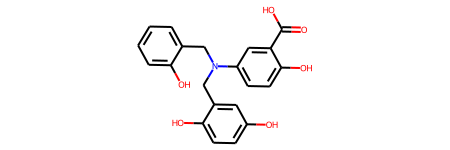

In [43]:
#Visualising the 1st compound
cpd_1 = Chem.MolFromSmiles(df_select.iloc[:, -3][0]) 
cpd_1

**Using code similar to above, create the remaining 9 molecules from their SMILES strings.**

In [44]:
#Assign the remaining 9 compounds
cpd_2 = Chem.MolFromSmiles(df_select.iloc[:, -3][1]) 
cpd_3 = Chem.MolFromSmiles(df_select.iloc[:, -3][2]) 
cpd_4 = Chem.MolFromSmiles(df_select.iloc[:, -3][3]) 
cpd_5 = Chem.MolFromSmiles(df_select.iloc[:, -3][4]) 
cpd_6 = Chem.MolFromSmiles(df_select.iloc[:, -3][5]) 
cpd_7 = Chem.MolFromSmiles(df_select.iloc[:, -3][6]) 
cpd_8 = Chem.MolFromSmiles(df_select.iloc[:, -3][7]) 
cpd_9 = Chem.MolFromSmiles(df_select.iloc[:, -3][8]) 
cpd_10 = Chem.MolFromSmiles(df_select.iloc[:, -3][9]) 

**Assign the ChEMBL ID's to the following variables.**

In [45]:
#Assign ChEMBL ID's to a new variable
id1 = df_select.iloc[:, 0][0]
id2 = df_select.iloc[:, 0][1]
id3 = df_select.iloc[:, 0][2]
id4 = df_select.iloc[:, 0][3]
id5 = df_select.iloc[:, 0][4]
id6 = df_select.iloc[:, 0][5]
id7 = df_select.iloc[:, 0][6]
id8 = df_select.iloc[:, 0][7]
id9 = df_select.iloc[:, 0][8]
id10 = df_select.iloc[:, 0][9]

We will now visualise the 10 compounds from the `df_select` dataframe.

**Run the cell below.**

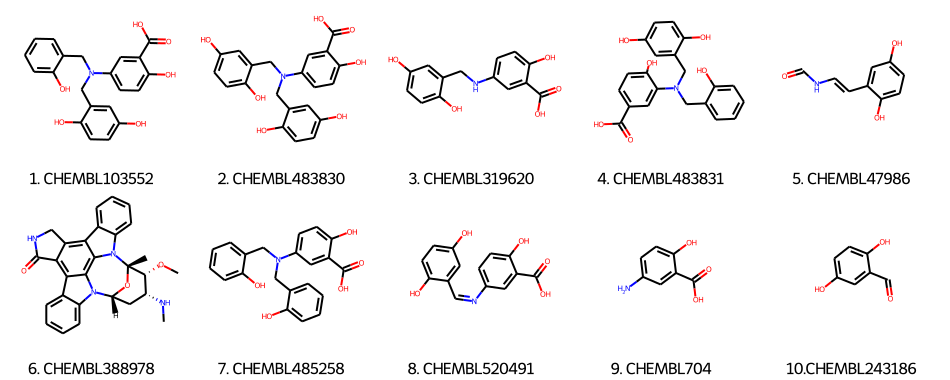

In [46]:
#Create a grid of the 10 compound structures
Draw.MolsToGridImage(
    (cpd_1, cpd_2, cpd_3, cpd_4, cpd_5, cpd_6, cpd_7, cpd_8, cpd_9, cpd_10),
    legends = ('1. ' + id1,'2. ' + id2,'3. ' + id3,'4. ' + id4,'5. ' + id5, 
               '6. ' + id6, '7. ' + id7, '8. ' + id8, '9. ' + id9, '10.'+id10),
    molsPerRow=5, subImgSize=(190,190)
)

**Tagrisso**, the drug used to target a mutated form of the **EGRF** protein has the SMILES formula below:-

`CN1C=C(C2=CC=CC=C21)C3=NC(=NC=C3)NC4=C(C=C(C(=C4)NC(=O)C=C)N(C)CCN(C)C)OC`

**Using the `Chem.MolFromSmiles()` function as before, visualise Tagrisso's structure. Call the molecule `tgr`.**

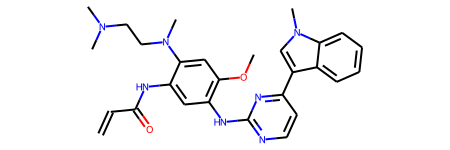

In [47]:
#Visualise Tagrisso's structure
tgr = Chem.MolFromSmiles('CN1C=C(C2=CC=CC=C21)C3=NC(=NC=C3)NC4=C(C=C(C(=C4)NC(=O)C=C)N(C)CCN(C)C)OC') 
tgr

The following code compares the similarities of 2 molecules. **Run the cell below.**

In [48]:
#Comparing the strucural similaritiy of Tagrisso and cpd_1
ms = [cpd_1, tgr]
fps = [Chem.RDKFingerprint(x) for x in ms]
DataStructs.FingerprintSimilarity(fps[0], fps[1])

0.27253371185237757

**Adapt the code into a for loop, and iterate through all 10 compounds, determining their similarity with `tgr`.**

**TIP:** You will need to create a list of the compounds.

In [49]:
#Determining similarities between `tgr` and our 10 selected compounds
cpd_list = [cpd_1, cpd_2, cpd_3, cpd_4, cpd_5, cpd_6, cpd_7, cpd_8, cpd_9, cpd_10]
for x in cpd_list:
    ms = [x, tgr]
    fps = [Chem.RDKFingerprint(x) for x in ms]
    print(cpd_list.index(x)+1,'- ', round(DataStructs.FingerprintSimilarity(fps[0], fps[1]),4))
    

1 -  0.2725
2 -  0.2725
3 -  0.2283
4 -  0.2878
5 -  0.1316
6 -  0.5169
7 -  0.2621
8 -  0.2372
9 -  0.1505
10 -  0.0869


**Which compound is most similar?**

**What next?**

This workbook has gone briefly through the kind of pre-processing you might do to prepare a dataset for ML, which in the case of the drug-discovery process is called QSAR. More work would still be required to prepare the data (RDKit fingerprinting and Lipinski's rules), and the datasets used would be larger.